<a href="https://colab.research.google.com/github/KimJunGu9/ADP_basic/blob/main/3_5_%EB%B3%80%EC%88%98%EC%B6%95%EC%86%8C(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 변수 축소

# 주성분 분석

# 가. 주성분분석의 개념
# 주성분분석이란 데이터에 여러 변수들이 있을 때, 서로 상관성이 높은 변수들의 선형결합으로 
# 이루어진 "주성분"이라는 새로운 변수를 만들어 변수들을 요약하고 축소하는 기법 

# 나. 파이썬을 이용한 주성분분석
# 변수간의 스케일이 차이가 나면 스케일 큰 변수가 주성분에 영향을 많이 주기 때문에 주성분 분석 전에 변수를 표준화나 정규화시켜주는 것이 좋다. 
# 데이터 표준화에 사용하는 함수는 StandardScaler()이다.
# 파이썬에서 주성분분석을 수행할 수 있는 기본적인 함수는 sklearn의 PCA함수이다.
# pca.explained_variance_ratio_를 통해서 또는 Scree Plot으로 주성분의 설명력을 확인 할 수 있다.
# PCA함수는 공분산행렬의 고유벡터를 구하는 방법을 사용한다.

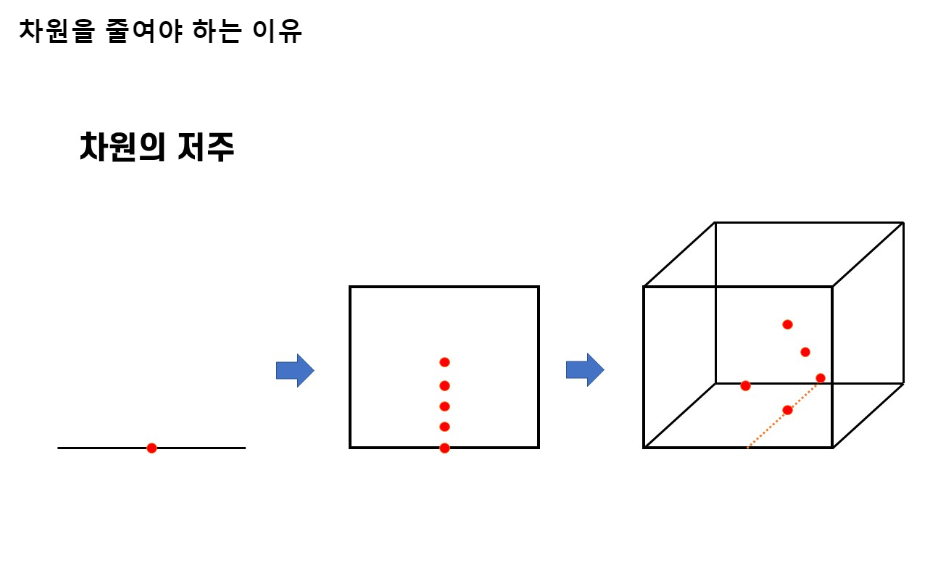

In [2]:
# 데이터 용량이 커질수록 불필요한 샘플 증가 현상이 일어남
# 과도한 정보를 훈련시키면 부정확하고 잘못된 모델이 탄생할 가능성이 증가함

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
Iris_data = pd.read_csv('/content/drive/MyDrive/ADP/Part.1/새 폴더/2. 데이터 핸들링/2.1.DataFrame 기본/example.csv')

In [11]:
#수치형 데이터만 추출

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = Iris_data.loc[:, features].values

In [12]:
#수치형 변수 정규화

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA

## Scree Plot 으로 주성분 개수 정하는 방법 

pca = PCA(n_components=4)
pca_fit = pca.fit(x)

In [14]:
pca_fit.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [15]:
print("\n ==================== PCA Result Summary ===================")
print("\n고유 값 : \n",pca.singular_values_)
print("\n분산 설명력: \n", pca.explained_variance_ratio_)


 ==================== PCA Result Summary ===================

고유 값 : 
 [20.89551896 11.75513248  4.7013819   1.75816839]

분산 설명력: 
 [0.72770452 0.23030523 0.03683832 0.00515193]


In [16]:
features

['sepal length', 'sepal width', 'petal length', 'petal width']

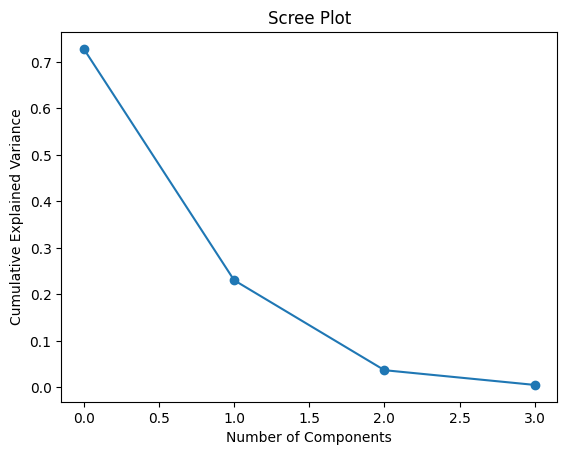

In [17]:
# Scree Plot 

import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_,'o-')

In [18]:
pca = PCA(n_components=2) #PCA 객체 생성 (주성분 갯수 2개 생성)
principalComponents = pca.fit_transform(x) ## 주성분 2개 객체에 할당 
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component1', 'principal component2']) 
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [19]:
principalDf

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


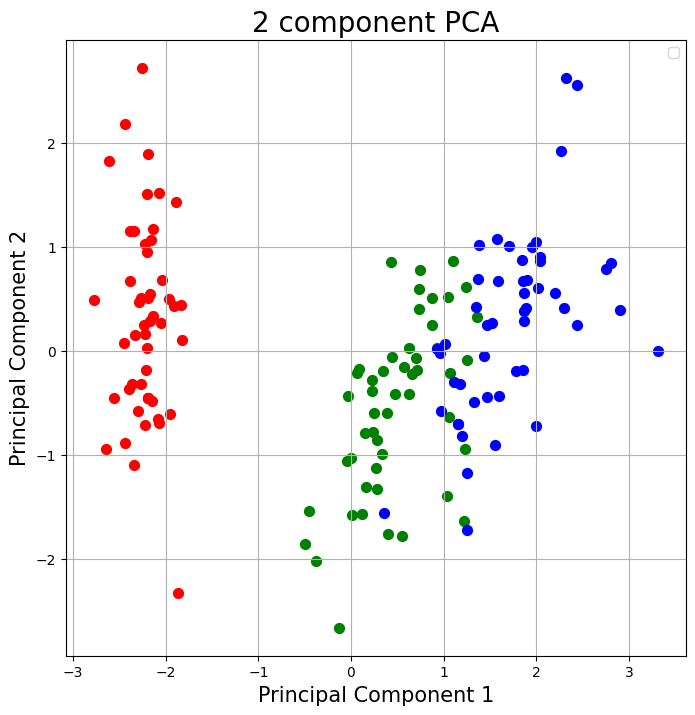

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = Iris_data['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1']
               , principalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend()
ax.grid()